In [1]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# For financial data retrieval
import pandas_datareader.data as web

# For date handling
from datetime import datetime

# For sentiment analysis
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# import torch

from alpha_vantage.timeseries import TimeSeries
from fredapi import Fred
from newsapi import NewsApiClient
import requests
import matplotlib.pyplot as plt

import ta  # Technical Analysis library
from sklearn.model_selection import train_test_split

import math
import seaborn as sns
import networkx as nx

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset, random_split

import random

# Set random seeds for reproducibility
np.random.seed(42)
# torch.manual_seed(42)
random.seed(42)


In [5]:
# # Initialize Alpha Vantage API
# api_key_alpha = 'E6DCENI7HUDGSZRV'  # Replace with your Alpha Vantage API key
# ts = TimeSeries(key=api_key_alpha, output_format='pandas')

# # Fetch daily data for S&P 500 ETF (e.g., SPY)
# sp500_data, meta_data = ts.get_daily(symbol='SPY', outputsize='full')

# # Reset index to make 'Date' a column
# sp500_data.reset_index(inplace=True)

# # Rename columns to match previous code
# sp500_data.rename(columns={
#     'date': 'Date',
#     '1. open': 'Open',
#     '2. high': 'High',
#     '3. low': 'Low',
#     '4. close': 'Close',
#     '5. volume': 'Volume'
# }, inplace=True)

# # Convert 'Date' to datetime
# sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

In [2]:
sp500_data = pd.read_csv('sp500_data.csv')
sp500_data

,Date,Open,High,Low,Close,Volume
0,2024-11-26,598.8000,601.3300,598.0700,600.6500,45621288.0
1,2024-11-25,599.5200,600.8600,595.2000,597.5300,42441393.0
2,2024-11-22,593.6600,596.1500,593.1525,595.5100,38226390.0
3,2024-11-21,593.4000,595.1200,587.4500,593.6700,46750285.0
4,2024-11-20,590.3800,590.7900,584.6300,590.5000,50032576.0
...,...,...,...,...,...,...
6304,1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0
6305,1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0
6306,1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0
6307,1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0


In [ ]:
# Initialize FRED API
fred = Fred(api_key='a6d8760ec5aac045396d0e0b7039aec7')

# Define series IDs and their corresponding indicators
series_dict = {
    'DCOILWTICO': 'Crude Oil WTI Futures',
    'DFF': 'Federal Funds Rate',
    'DEXUSEU': 'USD/EUR Exchange Rate',
    'DEXUSUK': 'USD/GBP Exchange Rate',
    'DEXCHUS': 'USD/CHF Exchange Rate',
    'DEXNOUS': 'USD/NOK Exchange Rate',
    'DEXSIUS': 'USD/SGD Exchange Rate',
    'DEXUSAL': 'USD/AUD Exchange Rate',
    'DEXCHUS': 'USD/CNY Exchange Rate',
    'DEXJPUS': 'USD/JPY Exchange Rate',
    'DEXINUS': 'USD/INR Exchange Rate',
}

# Set observation period
start_date = '1999-11-01'
end_date = '2024-11-01'

# Initialize an empty DataFrame to store the data
data_frames = []

# Fetch each series separately and store in the list
for series_id, series_name in series_dict.items():
    try:
        # Fetch series
        series_data = fred.get_series(series_id, observation_start=start_date, observation_end=end_date)
        
        # Convert to DataFrame and rename column
        series_df = series_data.to_frame(name=series_name)
        
        # Append to list
        data_frames.append(series_df)
    except Exception as e:
        print(f"Error fetching {series_name} ({series_id}): {e}")

# Concatenate all data frames on the date index
fred_df = pd.concat(data_frames, axis=1)

# Reset index to include the date as a column
fred_df = fred_df.reset_index().rename(columns={'index': 'Date'})

# Display the DataFrame
fred_df


In [5]:
# Initialize FRED API
fred2 = Fred(api_key='a6d8760ec5aac045396d0e0b7039aec7')

# Define series IDs and their corresponding indicators
series_dict = {
    'M1SL': 'M1 Money Supply',
    'M2SL': 'M2 Money Supply',
    'CPIAUCSL': 'Consumer Price Index (CPI)',
    'PPIACO': 'Producer Price Index (PPI)',
    'UNRATE': 'Unemployment Rate'
}

# Set observation period
start_date = '1999-11-01'
end_date = '2024-11-01'

# Initialize an empty DataFrame to store the data
data_frames = []

# Fetch each series separately and store in the list
for series_id, series_name in series_dict.items():
    try:
        # Fetch series
        series_data = fred2.get_series(series_id, observation_start=start_date, observation_end=end_date)
        
        # Convert to DataFrame and rename column
        series_df = series_data.to_frame(name=series_name)
        
        # Append to list
        data_frames.append(series_df)
    except Exception as e:
        print(f"Error fetching {series_name} ({series_id}): {e}")

# Concatenate all data frames on the date index
fred_df2 = pd.concat(data_frames, axis=1)

# Reset index to include the date as a column
fred_df2 = fred_df2.reset_index().rename(columns={'index': 'Date'})

# Display the DataFrame
fred_df2


Error fetching Producer Price Index (PPI) (PPIACO): <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>


,Date,M1 Money Supply,M2 Money Supply,Consumer Price Index (CPI),Unemployment Rate
0,1999-11-01,1110.7,4611.8,168.400,4.1
1,1999-12-01,1122.2,4639.3,168.800,4.0
2,2000-01-01,1122.1,4667.6,169.300,4.0
3,2000-02-01,1108.6,4680.9,170.000,4.1
4,2000-03-01,1107.5,4711.7,171.000,4.0
...,...,...,...,...,...
295,2024-06-01,18045.2,21020.1,313.049,4.1
296,2024-07-01,18031.8,21039.4,313.534,4.3
297,2024-08-01,18094.5,21141.3,314.121,4.2
298,2024-09-01,18152.6,21222.7,314.686,4.1


In [6]:
# Ensure 'Date' columns are in datetime format
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])
fred_df['Date'] = pd.to_datetime(fred_df['Date'])
fred_df2['Date'] = pd.to_datetime(fred_df2['Date'])

# Merge the tables on the 'Date' column
# Perform an outer join to preserve all dates across datasets
combined_df = pd.merge(sp500_data, fred_df, on='Date', how='outer')
combined_df = pd.merge(combined_df, fred_df2, on='Date', how='outer')

# Sort by 'Date' to ensure proper time-series alignment
combined_df.sort_values(by='Date', inplace=True)

# Reset the index for convenience
combined_df.reset_index(drop=True, inplace=True)

# Check data types
print("Data Types of Combined DataFrame:")
print(combined_df.dtypes)

# Display the first few rows of the combined dataset
combined_df.head()


Data Types of Combined DataFrame:
Date                          datetime64[ns]
Open                                 float64
High                                 float64
Low                                  float64
Close                                float64
Volume                               float64
USD/CNY Exchange Rate                float64
USD/NOK Exchange Rate                float64
USD/SGD Exchange Rate                float64
USD/AUD Exchange Rate                float64
USD/JPY Exchange Rate                float64
USD/INR Exchange Rate                float64
M1 Money Supply                      float64
M2 Money Supply                      float64
Consumer Price Index (CPI)           float64
Unemployment Rate                    float64
dtype: object


,Date,Open,High,Low,Close,Volume,USD/CNY Exchange Rate,USD/NOK Exchange Rate,USD/SGD Exchange Rate,USD/AUD Exchange Rate,USD/JPY Exchange Rate,USD/INR Exchange Rate,M1 Money Supply,M2 Money Supply,Consumer Price Index (CPI),Unemployment Rate
0,1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0,8.2779,7.8770,1.6565,0.6382,104.19,43.51,1110.7,4611.8,168.4,4.1
1,1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0,8.2781,7.8650,1.6645,0.6405,104.15,43.45,NaN,NaN,NaN,NaN
2,1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0,8.2781,7.8825,1.6700,0.6437,105.00,43.46,NaN,NaN,NaN,NaN
3,1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0,8.2780,7.9120,1.6665,0.6383,104.48,43.45,NaN,NaN,NaN,NaN
4,1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0,8.2779,7.9260,1.6715,0.6385,106.33,43.45,NaN,NaN,NaN,NaN


In [7]:
# Step 1: Check for duplicate dates in the combined dataset
duplicate_dates = combined_df[combined_df.duplicated(subset='Date', keep=False)]
if duplicate_dates.empty:
    print("No duplicate dates found after merging.")
else:
    print(f"Duplicate dates found:\n{duplicate_dates}")

# Step 2: Check for missing values after the merge
missing_summary = combined_df.isnull().sum()
print("\nMissing Value Summary (per column):")
print(missing_summary)

# Step 3: Count rows with missing values in any column
rows_with_missing = combined_df[combined_df.isnull().any(axis=1)]
print(f"\nNumber of rows with missing values: {len(rows_with_missing)}")

# Step 4: Validate row counts
print(f"\nOriginal row counts:")
print(f"sp500_data: {len(sp500_data)}")
print(f"fred_df: {len(fred_df)}")
print(f"fred_df2: {len(fred_df2)}")
print(f"Combined DataFrame: {len(combined_df)}")

# Step 5: Check for unmatched dates in each dataset
sp500_unmatched = sp500_data[~sp500_data['Date'].isin(combined_df['Date'])]
fred_unmatched = fred_df[~fred_df['Date'].isin(combined_df['Date'])]
fred2_unmatched = fred_df2[~fred_df2['Date'].isin(combined_df['Date'])]

print(f"\nUnmatched dates in sp500_data: {len(sp500_unmatched)}")
print(f"Unmatched dates in fred_df: {len(fred_unmatched)}")
print(f"Unmatched dates in fred_df2: {len(fred2_unmatched)}")


No duplicate dates found after merging.

Missing Value Summary (per column):
Date                             0
Open                           318
High                           318
Low                            318
Close                          318
Volume                         318
USD/CNY Exchange Rate          354
USD/NOK Exchange Rate          355
USD/SGD Exchange Rate          355
USD/AUD Exchange Rate          355
USD/JPY Exchange Rate          355
USD/INR Exchange Rate          356
M1 Money Supply               6327
M2 Money Supply               6327
Consumer Price Index (CPI)    6327
Unemployment Rate             6327
dtype: int64

Number of rows with missing values: 6432

Original row counts:
sp500_data: 6309
fred_df: 6525
fred_df2: 300
Combined DataFrame: 6627

Unmatched dates in sp500_data: 0
Unmatched dates in fred_df: 0
Unmatched dates in fred_df2: 0


In [8]:
combined_df

,Date,Open,High,Low,Close,Volume,USD/CNY Exchange Rate,USD/NOK Exchange Rate,USD/SGD Exchange Rate,USD/AUD Exchange Rate,USD/JPY Exchange Rate,USD/INR Exchange Rate,M1 Money Supply,M2 Money Supply,Consumer Price Index (CPI),Unemployment Rate
0,1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0,8.2779,7.8770,1.6565,0.6382,104.19,43.51,1110.7,4611.8,168.4,4.1
1,1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0,8.2781,7.8650,1.6645,0.6405,104.15,43.45,NaN,NaN,NaN,NaN
2,1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0,8.2781,7.8825,1.6700,0.6437,105.00,43.46,NaN,NaN,NaN,NaN
3,1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0,8.2780,7.9120,1.6665,0.6383,104.48,43.45,NaN,NaN,NaN,NaN
4,1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0,8.2779,7.9260,1.6715,0.6385,106.33,43.45,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,2024-11-20,590.3800,590.7900,584.6300,590.5000,50032576.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6623,2024-11-21,593.4000,595.1200,587.4500,593.6700,46750285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6624,2024-11-22,593.6600,596.1500,593.1525,595.5100,38226390.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6625,2024-11-25,599.5200,600.8600,595.2000,597.5300,42441393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Impute monthly data using forward fill
combined_df2 = combined_df.copy()
for column in combined_df.columns:
    combined_df[column] = combined_df[column].ffill()


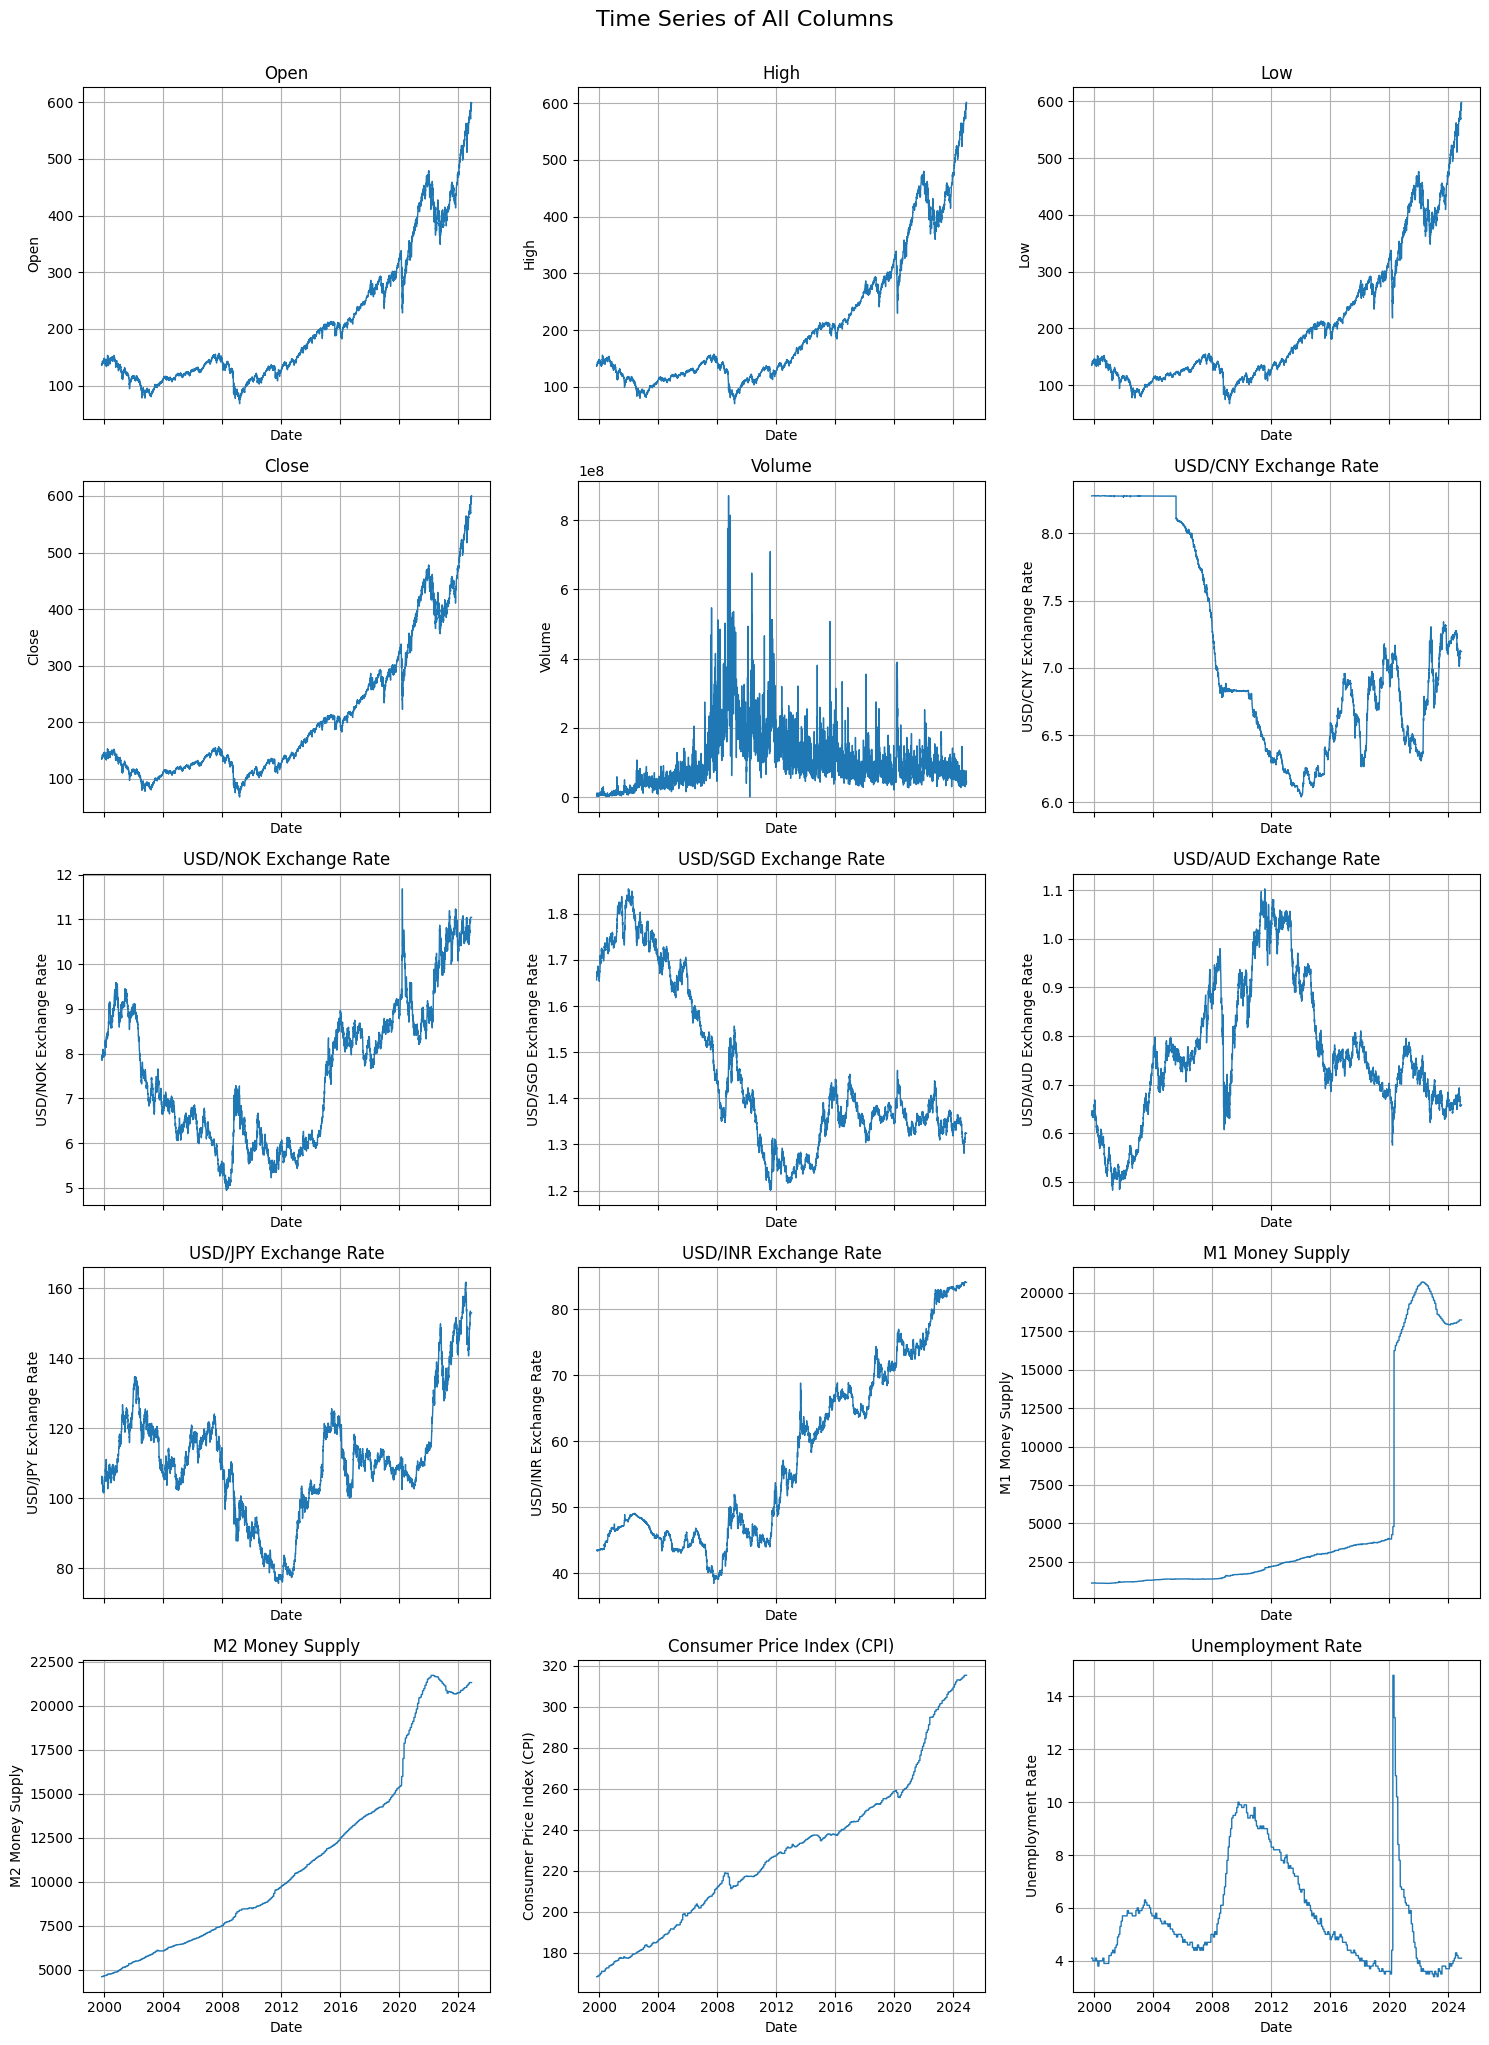

In [10]:
# Determine the number of columns and rows for the grid layout
columns_per_row = 3  # Number of subplots per row
total_columns = [col for col in combined_df.columns if col != 'Date']  # Exclude the 'Date' column
total_plots = len(total_columns)
rows = math.ceil(total_plots / columns_per_row)  # Calculate number of rows needed

# Create the grid layout for subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(15, rows * 4), sharex=True)
axes = axes.flatten()  # Flatten axes array for easy indexing

# Plot each column in a separate subplot
for i, column in enumerate(total_columns):
    ax = axes[i]
    ax.plot(combined_df['Date'], combined_df[column], linewidth=1)
    ax.set_title(column, fontsize=12)
    ax.set_xlabel("Date", fontsize=10)
    ax.set_ylabel(column, fontsize=10)
    ax.grid(True)

# Remove empty subplots if the number of plots is not a perfect multiple of columns_per_row
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Time Series of All Columns", fontsize=16, y=1.02)  # Add an overall title
plt.show()


In [225]:
# combined_df.to_csv('combined_df.csv', index=False)

In [11]:
df = combined_df.copy()

# Ensure the data is sorted by date
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)

# 1. Candlestick Pattern Classification (13 classes)
eight_trigram_patterns = [
    'BullishHorn', 'BearHorn', 'BullishHigh', 'BearHigh',
    'BullishLow', 'BearLow', 'BullishHarami', 'BearHarami'
]

def classify_eight_trigram(row):
    # Skip the first row as there's no previous day to compare
    if row.name == 0:
        return 'Neutral'

    # Today's and yesterday's high, low, close prices
    ht = row['High']
    lt = row['Low']
    ct = row['Close']

    ht_prev = df.loc[row.name - 1, 'High']
    lt_prev = df.loc[row.name - 1, 'Low']
    ct_prev = df.loc[row.name - 1, 'Close']

    # Apply the eight-trigram conditions
    # 1. BullishHorn
    if (ht > ht_prev) and (lt < lt_prev) and (ct > ct_prev):
        return 'BullishHorn'

    # 2. BearHorn
    elif (ht > ht_prev) and (lt < lt_prev) and (ct < ct_prev):
        return 'BearHorn'

    # 3. BullishHigh
    elif (ht > ht_prev) and (lt > lt_prev) and (ct > ct_prev):
        return 'BullishHigh'

    # 4. BearHigh
    elif (ht > ht_prev) and (lt > lt_prev) and (ct < ct_prev):
        return 'BearHigh'

    # 5. BullishLow
    elif (ht < ht_prev) and (lt < lt_prev) and (ct > ct_prev):
        return 'BullishLow'

    # 6. BearLow
    elif (ht < ht_prev) and (lt < lt_prev) and (ct < ct_prev):
        return 'BearLow'

    # 7. BullishHarami
    elif (ht < ht_prev) and (lt > lt_prev) and (ct > ct_prev):
        return 'BullishHarami'

    # 8. BearHarami
    elif (ht < ht_prev) and (lt > lt_prev) and (ct < ct_prev):
        return 'BearHarami'

    else:
        return 'Neutral'

# Apply the function to classify each row
df['Eight_Trigram_Pattern'] = df.apply(classify_eight_trigram, axis=1)

# Map patterns to numerical codes
df['Eight_Trigram_Code'] = df['Eight_Trigram_Pattern'].map({
    'BullishHorn': 1,
    'BearHorn': 2,
    'BullishHigh': 3,
    'BearHigh': 4,
    'BullishLow': 5,
    'BearLow': 6,
    'BullishHarami': 7,
    'BearHarami': 8,
    'Neutral': 0
})

# 2. Inter-day Price Movement Patterns (Eight-Trigram Scheme)
# Again, we'll use standard definitions due to lack of specifics

def classify_inter_day(row):
    if row.name == 0:
        return 'Neutral'  # No previous day to compare with
    else:
        prev_close = df.loc[row.name - 1, 'Close']
        today_open = row['Open']

        if today_open > prev_close:
            movement = 'Gap Up'
        elif today_open < prev_close:
            movement = 'Gap Down'
        else:
            movement = 'No Gap'

        # Further classification can be added based on High and Low
        return movement



In [12]:
# 1. Custom Functions and Initial Features
df['Inter_Day_Movement'] = df.apply(classify_inter_day, axis=1)
df['Inter_Day_Movement_Code'] = pd.factorize(df['Inter_Day_Movement'])[0]

# 2. Volume Rate of Change
look_back_period = 5  # Adjust based on your analysis needs
n = look_back_period  # Define n based on look_back_period
df['Volume_ROC'] = df['Volume'].pct_change(periods=n) * 100

# 3. Overlap Indicators
## Simple Moving Averages
df['SMA_5'] = ta.trend.SMAIndicator(close=df['Close'], window=5).sma_indicator()
df['SMA_10'] = ta.trend.SMAIndicator(close=df['Close'], window=10).sma_indicator()
# df['SMA_20'] = ta.trend.SMAIndicator(close=df['Close'], window=20).sma_indicator()
df['SMA_30'] = ta.trend.SMAIndicator(close=df['Close'], window=30).sma_indicator()

## Exponential Moving Averages
df['EMA_10'] = ta.trend.EMAIndicator(close=df['Close'], window=10).ema_indicator()
# df['EMA_20'] = ta.trend.EMAIndicator(close=df['Close'], window=20).ema_indicator()
df['EMA_30'] = ta.trend.EMAIndicator(close=df['Close'], window=30).ema_indicator()

## Double Exponential Moving Average (DEMA)
def calculate_dema(series, window):
    ema = ta.trend.EMAIndicator(close=series, window=window).ema_indicator()
    ema_ema = ta.trend.EMAIndicator(close=ema, window=window).ema_indicator()
    dema = 2 * ema - ema_ema
    return dema

df['DEMA_5'] = calculate_dema(df['Close'], window=5)
df['DEMA_30'] = calculate_dema(df['Close'], window=30)

## Triple Exponential Moving Average (TEMA)
def calculate_tema(series, window):
    ema1 = ta.trend.EMAIndicator(close=series, window=window).ema_indicator()
    ema2 = ta.trend.EMAIndicator(close=ema1, window=window).ema_indicator()
    ema3 = ta.trend.EMAIndicator(close=ema2, window=window).ema_indicator()
    tema = 3 * (ema1 - ema2) + ema3
    return tema

df['TEMA_30'] = calculate_tema(df['Close'], window=30)

## Weighted Moving Average (WMA)
df['WMA_30'] = ta.trend.WMAIndicator(close=df['Close'], window=30).wma()

## Kaufman's Adaptive Moving Average (KAMA)
df['KAMA_5'] = ta.momentum.KAMAIndicator(close=df['Close'], window=5).kama()

## Parabolic SAR
psar = ta.trend.PSARIndicator(high=df['High'], low=df['Low'], close=df['Close'])
df['PSAR'] = psar.psar()

## Bollinger Bands
bb = ta.volatility.BollingerBands(close=df['Close'], window=5, window_dev=2)
df['BB_UPPER'] = bb.bollinger_hband()
df['BB_MIDDLE'] = bb.bollinger_mavg()
df['BB_LOWER'] = bb.bollinger_lband()

# 4. Momentum Indicators
## Average Directional Movement Index (ADX)
df['ADX_10'] = ta.trend.ADXIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=10).adx()
# df['ADX_14'] = ta.trend.ADXIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=14).adx()

## Commodity Channel Index (CCI)
df['CCI_10'] = ta.trend.CCIIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=10).cci()

## Moving Average Convergence Divergence (MACD)
macd = ta.trend.MACD(close=df['Close'], window_slow=26, window_fast=12, window_sign=9)
df['MACD'] = macd.macd()
df['MACD_SIGNAL'] = macd.macd_signal()
df['MACD_HIST'] = macd.macd_diff()

## Relative Strength Index (RSI)
df['RSI_10'] = ta.momentum.RSIIndicator(close=df['Close'], window=10).rsi()
# df['RSI_14'] = ta.momentum.RSIIndicator(close=df['Close'], window=14).rsi()

## Money Flow Index (MFI)
df['MFI_10'] = ta.volume.MFIIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=10).money_flow_index()
# df['MFI_14'] = ta.volume.MFIIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=14).money_flow_index()

## Rate of Change (ROC)
df['ROC_10'] = ta.momentum.ROCIndicator(close=df['Close'], window=10).roc()

## Stochastic Oscillator
stoch = ta.momentum.StochasticOscillator(high=df['High'], low=df['Low'], close=df['Close'])
df['STOCH_%K'] = stoch.stoch()
df['STOCH_%D'] = stoch.stoch_signal()

## Williams %R
df['WILLR_10'] = ta.momentum.WilliamsRIndicator(high=df['High'], low=df['Low'], close=df['Close'], lbp=10).williams_r()

## Ultimate Oscillator (ULTOSC)
df['ULTOSC'] = ta.momentum.UltimateOscillator(high=df['High'], low=df['Low'], close=df['Close']).ultimate_oscillator()

# Balance of Power (BOP)
df['BOP'] = (df['Close'] - df['Open']) / (df['High'] - df['Low'])
df['BOP'] = df['BOP'].replace([np.inf, -np.inf], np.nan).fillna(0)

## Chande Momentum Oscillator (CMO)
def calculate_cmo(series, window):
    delta = series.diff()
    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)
    sum_gain = gain.rolling(window=window).sum()
    sum_loss = loss.rolling(window=window).sum()
    cmo = 100 * (sum_gain - sum_loss) / (sum_gain + sum_loss)
    return cmo
df['CMO_10'] = calculate_cmo(df['Close'], window=10)

# 5. Volume Indicators
## Accumulation/Distribution Index (ADI
df['ADI'] = ta.volume.AccDistIndexIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume']).acc_dist_index()

## On-Balance Volume (OBV)
df['OBV'] = ta.volume.OnBalanceVolumeIndicator(close=df['Close'], volume=df['Volume']).on_balance_volume()

## Chaikin Money Flow (CMF)
def calculate_chaikin_oscillator(high, low, close, volume, fast_period=3, slow_period=10):
    ad = ta.volume.AccDistIndexIndicator(high=high, low=low, close=close, volume=volume).acc_dist_index()
    ema_fast = ta.trend.EMAIndicator(close=ad, window=fast_period).ema_indicator()
    ema_slow = ta.trend.EMAIndicator(close=ad, window=slow_period).ema_indicator()
    adosc = ema_fast - ema_slow
    return adosc
df['ADOSC'] = calculate_chaikin_oscillator(df['High'], df['Low'], df['Close'], df['Volume'])

# 6. Volatility Indicators
## Average True Range (ATR)
df['ATR_10'] = ta.volatility.AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=10).average_true_range()
# df['ATR_14'] = ta.volatility.AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=14).average_true_range()

## Normalized Average True Range (NATR)
df['NATR_10'] = (df['ATR_10'] / df['Close']) * 100
# df['NATR_14'] = (df['ATR_14'] / df['Close']) * 100

## True Range (TRANGE)
def calculate_true_range(high, low, close):
    prev_close = close.shift(1)
    tr = pd.concat([high - low, (high - prev_close).abs(), (low - prev_close).abs()], axis=1).max(axis=1)
    return tr
df['TRANGE'] = calculate_true_range(df['High'], df['Low'], df['Close'])

# 7. Other Indicators
## Average Price
df['AVGPRICE'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

## Median Price
df['MEDPRICE'] = (df['High'] + df['Low']) / 2

## Typical Price
df['TYPPRICE'] = (df['High'] + df['Low'] + df['Close']) / 3

## Weighted Close Price
df['WCLPRICE'] = (df['High'] + df['Low'] + 2 * df['Close']) / 4

# 8. Lagged Features
# df['Lag_1'] = df['Close'].shift(1)
# df['Lag_2'] = df['Close'].shift(2)

# 9. Returns
df['Return'] = df['Close'].pct_change()

# 10. Rolling Statistics
df['Rolling_Median_10'] = df['Close'].rolling(window=10).median()
df['Rolling_Std_10'] = df['Close'].rolling(window=10).std()
df['Rolling_Median_5'] = df['Close'].rolling(window=5).median()
df['Rolling_Std_5'] = df['Close'].rolling(window=5).std()

# 11. Time-Based Features
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

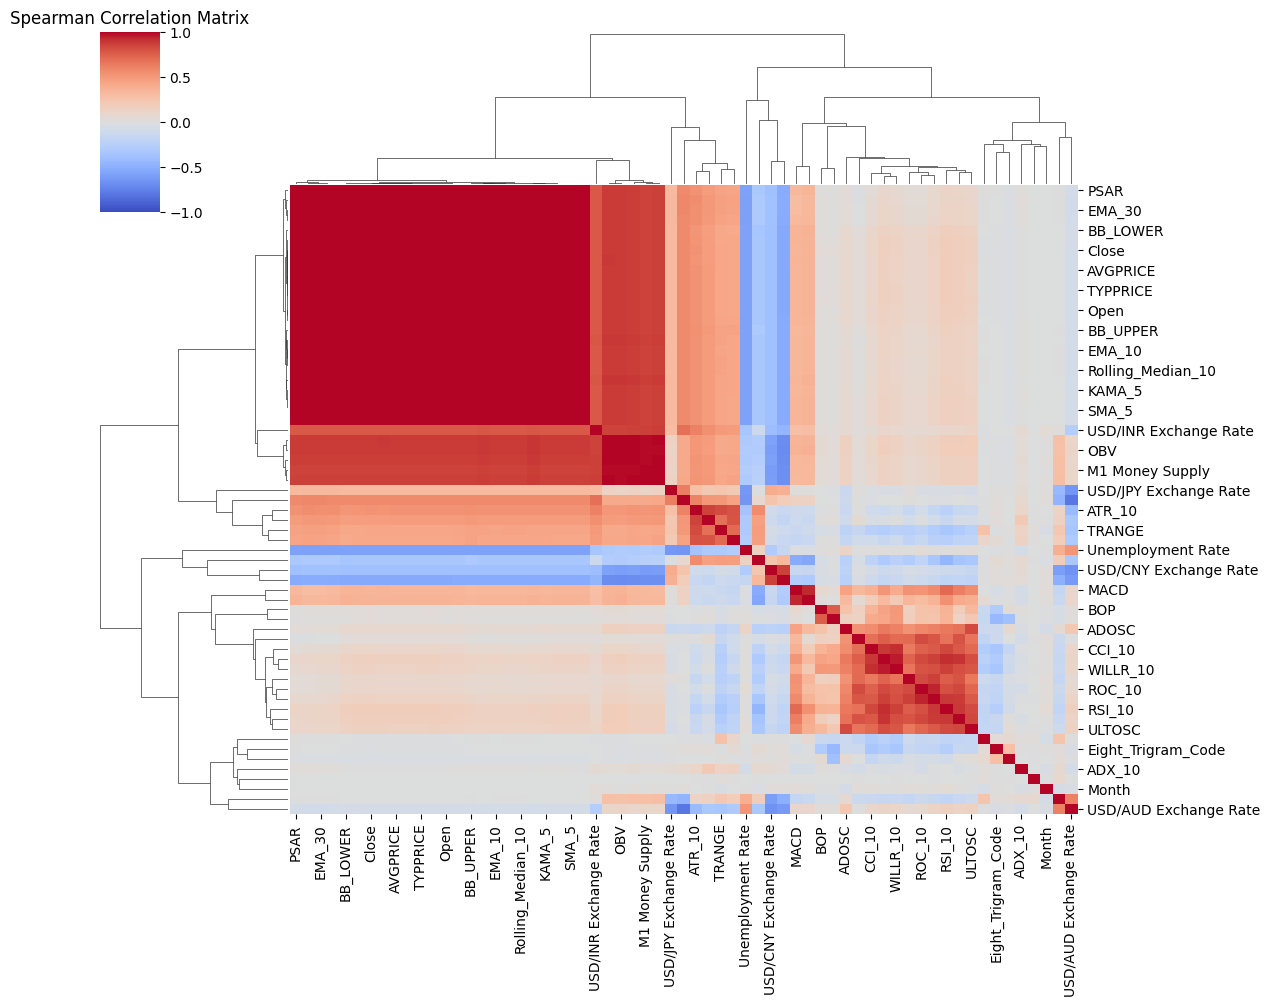

Groups of highly correlated features:
{'DEMA_5', 'SMA_30', 'BB_LOWER', 'EMA_30', 'Low', 'BB_MIDDLE', 'DEMA_30', 'KAMA_5', 'Rolling_Median_5', 'SMA_10', 'TEMA_30', 'SMA_5', 'PSAR', 'AVGPRICE', 'MEDPRICE', 'WMA_30', 'BB_UPPER', 'High', 'Open', 'WCLPRICE', 'EMA_10', 'Rolling_Median_10', 'TYPPRICE'}
{'M1 Money Supply', 'Consumer Price Index (CPI)', 'ADI', 'OBV', 'M2 Money Supply'}
{'STOCH_%K', 'RSI_10', 'CCI_10', 'STOCH_%D', 'WILLR_10'}
{'MACD_SIGNAL', 'MACD'}
{'CMO_10', 'ROC_10'}
Index(['Close', 'Volume', 'USD/CNY Exchange Rate', 'USD/NOK Exchange Rate',
       'USD/SGD Exchange Rate', 'USD/AUD Exchange Rate',
       'USD/JPY Exchange Rate', 'USD/INR Exchange Rate', 'M1 Money Supply',
       'Unemployment Rate', 'Eight_Trigram_Code', 'Inter_Day_Movement_Code',
       'Volume_ROC', 'DEMA_5', 'ADX_10', 'MACD_SIGNAL', 'MACD_HIST', 'MFI_10',
       'STOCH_%K', 'ULTOSC', 'BOP', 'CMO_10', 'ADOSC', 'ATR_10', 'NATR_10',
       'TRANGE', 'Return', 'Rolling_Std_10', 'Rolling_Std_5', 'Day_of_Week',


In [13]:
# Select only numeric columns
spearman_df = df.select_dtypes(include=[np.number])

# Calculate the Spearman correlation matrix
corr_matrix = spearman_df.corr(method='spearman')

# Set a threshold for high correlation
threshold = 0.90

# Create a mask to identify highly correlated features
high_corr_var = np.where(np.abs(corr_matrix) > threshold)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# Create a graph to group highly correlated features
G = nx.Graph()
G.add_edges_from(high_corr_var)

# Find connected components (groups of highly correlated features)
groups = list(nx.connected_components(G))

# Manually specify which feature to keep from the first group
features_to_remove = set()
for group in groups:
    if 'Close' in group:
        group.remove('Close')
    features_to_remove.update(list(group)[1:])  # Keep one feature from each group

spearman_df.drop(columns=features_to_remove, inplace=True)

# Visualize the correlation matrix using a clustermap without annotations
sns.clustermap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, figsize=(12, 10))
plt.title('Spearman Correlation Matrix')
plt.show()

# Print the groups of highly correlated features
print("Groups of highly correlated features:")
for group in groups:
    print(group)

print(spearman_df.columns)

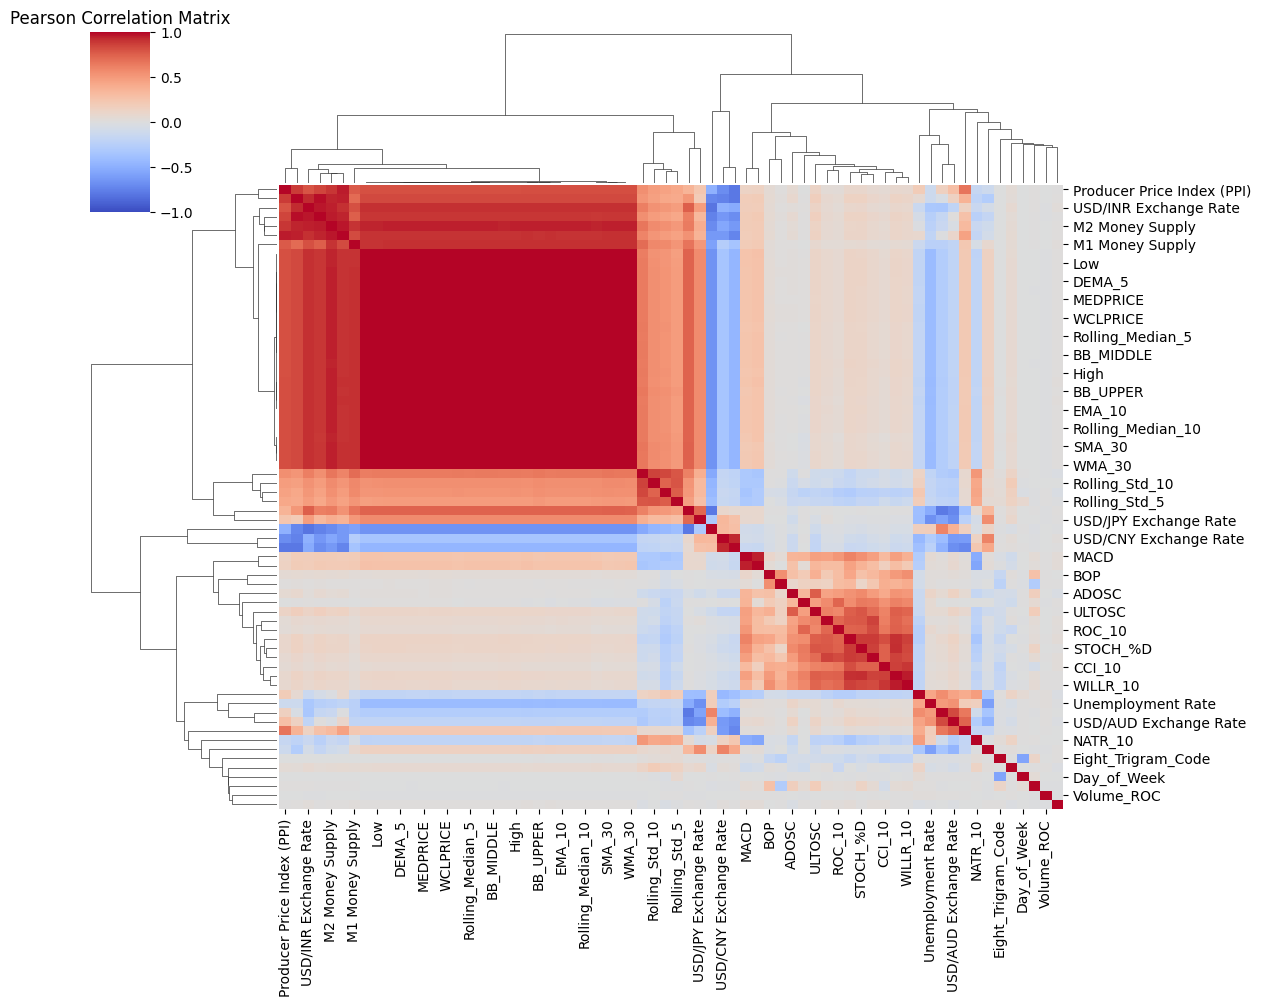

Groups of highly correlated features:
{'Low', 'BB_MIDDLE', 'EMA_10', 'AVGPRICE', 'WMA_30', 'MEDPRICE', 'TEMA_30', 'SMA_5', 'DEMA_30', 'KAMA_5', 'PSAR', 'BB_UPPER', 'SMA_10', 'WCLPRICE', 'Open', 'Rolling_Median_10', 'TYPPRICE', 'Close', 'SMA_30', 'EMA_30', 'Rolling_Median_5', 'BB_LOWER', 'High', 'DEMA_5'}
{'ADI', 'Producer Price Index (PPI)', 'OBV', 'USD/INR Exchange Rate', 'M2 Money Supply', 'Consumer Price Index (CPI)'}
{'MACD', 'MACD_SIGNAL'}
{'STOCH_%K', 'WILLR_10'}


In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the Spearman correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

# Set a threshold for high correlation
threshold = 0.95

# Create a mask to identify highly correlated features
high_corr_var = np.where(np.abs(corr_matrix) > threshold)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# Create a graph to group highly correlated features
G = nx.Graph()
G.add_edges_from(high_corr_var)

# Find connected components (groups of highly correlated features)
groups = list(nx.connected_components(G))

# Remove one feature from each highly correlated group
features_to_remove = set()
for group in groups:
    features_to_remove.update(list(group)[1:])  # Keep one feature from each group

numeric_df.drop(columns=features_to_remove, inplace=True)

# Visualize the correlation matrix using a clustermap without annotations
sns.clustermap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, figsize=(12, 10))
plt.title('Pearson Correlation Matrix')
plt.show()

# Print the groups of highly correlated features
print("Groups of highly correlated features:")
for group in groups:
    print(group)

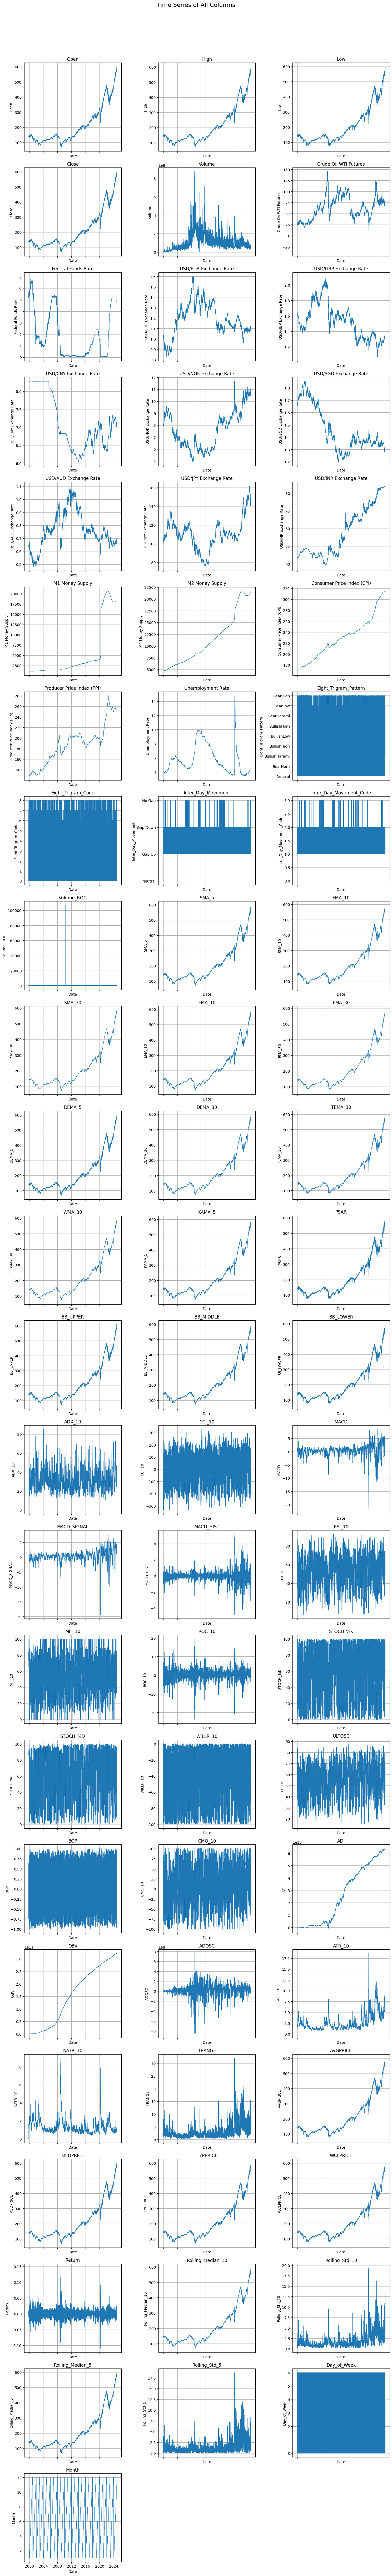

In [15]:
# Determine the number of columns and rows for the grid layout
columns_per_row = 3  # Number of subplots per row
total_columns = [col for col in df.columns if col != 'Date']  # Exclude the 'Date' column
total_plots = len(total_columns)
rows = math.ceil(total_plots / columns_per_row)  # Calculate number of rows needed

# Create the grid layout for subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(15, rows * 4), sharex=True)
axes = axes.flatten()  # Flatten axes array for easy indexing

# Plot each column in a separate subplot
for i, column in enumerate(total_columns):
    ax = axes[i]
    ax.plot(df['Date'], df[column], linewidth=1)
    ax.set_title(column, fontsize=12)
    ax.set_xlabel("Date", fontsize=10)
    ax.set_ylabel(column, fontsize=10)
    ax.grid(True)

# Remove empty subplots if the number of plots is not a perfect multiple of columns_per_row
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Time Series of All Columns", fontsize=16, y=1.02)  # Add an overall title
plt.show()


In [14]:
# Add a small constant to avoid log(0) or log of negative values
epsilon = 1e-10

# Log transformation for numerical columns except 'Close', 'Date', 'Day_of_Week', and 'Month'
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('Close')
if 'Day_of_Week' in numerical_cols:
	numerical_cols.remove('Day_of_Week')
if 'Month' in numerical_cols:
	numerical_cols.remove('Month')

# Check for negative or zero values and shift if necessary
negative_cols = [col for col in numerical_cols if (df[col] + epsilon <= 0).any()]
for col in negative_cols:
    min_val = df[col].min()
    df[col] = df[col] - min_val + 1  # Shift to make all values positive

# Apply log transformation
df[numerical_cols] = df[numerical_cols].apply(lambda x: np.log1p(x + epsilon))

# Sine and cosine transformation for 'Day_of_Week' and 'Month'
df['Day_of_Week_sin'] = np.sin(2 * np.pi * df['Day_of_Week'] / 7)
df['Day_of_Week_cos'] = np.cos(2 * np.pi * df['Day_of_Week'] / 7)
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df.drop(['Day_of_Week', 'Month'], axis=1, inplace=True)

# One-hot encoding for categorical columns
categorical_cols = ['Eight_Trigram_Pattern', 'Inter_Day_Movement']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # drop_first=True to avoid dummy variable trap

In [15]:
# Check for negative values after log transformation
for col in numerical_cols:
    if (df[col] <= 0).any():
        print(f'Non-positive values found in {col} after log transformation.')

In [16]:
# Handle missing values if any
if df.isnull().values.any():
    df = df.dropna().reset_index(drop=True)

In [18]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'USD/CNY Exchange Rate', 'USD/NOK Exchange Rate',
       'USD/SGD Exchange Rate', 'USD/AUD Exchange Rate',
       'USD/JPY Exchange Rate', 'USD/INR Exchange Rate', 'M1 Money Supply',
       'M2 Money Supply', 'Consumer Price Index (CPI)', 'Unemployment Rate',
       'Eight_Trigram_Code', 'Inter_Day_Movement_Code', 'Volume_ROC', 'SMA_5',
       'SMA_10', 'SMA_30', 'EMA_10', 'EMA_30', 'DEMA_5', 'DEMA_30', 'TEMA_30',
       'WMA_30', 'KAMA_5', 'PSAR', 'BB_UPPER', 'BB_MIDDLE', 'BB_LOWER',
       'ADX_10', 'CCI_10', 'MACD', 'MACD_SIGNAL', 'MACD_HIST', 'RSI_10',
       'MFI_10', 'ROC_10', 'STOCH_%K', 'STOCH_%D', 'WILLR_10', 'ULTOSC', 'BOP',
       'CMO_10', 'ADI', 'OBV', 'ADOSC', 'ATR_10', 'NATR_10', 'TRANGE',
       'AVGPRICE', 'MEDPRICE', 'TYPPRICE', 'WCLPRICE', 'Return',
       'Rolling_Median_10', 'Rolling_Std_10', 'Rolling_Median_5',
       'Rolling_Std_5', 'Day_of_Week_sin', 'Day_of_Week_cos', 'Month_sin',
       'Month_co

In [ ]:
# Step 1: Filter the DataFrame with selected features
features_set1 = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df_set1 = df[features_set1].copy()

# Step 2: Save the filtered DataFrame to a CSV file
# df_set1.to_csv('data_set1.csv', index=False)

In [17]:
# Step 1: Filter the DataFrame with selected features
features_set2 = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Crude Oil WTI Futures', 'Federal Funds Rate', 'USD/EUR Exchange Rate',
       'USD/GBP Exchange Rate', 'USD/CNY Exchange Rate',
       'USD/NOK Exchange Rate', 'USD/SGD Exchange Rate',
       'USD/AUD Exchange Rate', 'USD/JPY Exchange Rate',
       'USD/INR Exchange Rate', 'M1 Money Supply', 'M2 Money Supply',
       'Consumer Price Index (CPI)', 'Producer Price Index (PPI)',
       'Unemployment Rate']
df_set2 = df[features_set2].copy()

# Step 2: Save the filtered DataFrame to a CSV file
# df_set2.to_csv('data_set2.csv', index=False)

KeyError: "['Crude Oil WTI Futures', 'Federal Funds Rate', 'USD/EUR Exchange Rate', 'USD/GBP Exchange Rate', 'Producer Price Index (PPI)'] not in index"

In [ ]:
# Step 1: Filter the DataFrame with selected features
df_set3 = df.copy()

# Step 2: Save the filtered DataFrame to a CSV file
# df_set3.to_csv('data_set3.csv', index=False)

In [ ]:
# Step 1: Filter the DataFrame with selected features
features_set4 = spearman_df.columns.tolist()
df_set4 = df[features_set4].copy()
df_set4

# # Step 2: Save the filtered DataFrame to a CSV file
# df_set4.to_csv('data_set4.csv', index=False)

In [ ]:
df = df_set2.copy()
df

,Date,Open,High,Low,Close,Volume
0,2000-01-27,4.961751,4.964373,4.935373,140.2500,16.206354
1,2000-01-28,4.944763,4.949203,4.916553,135.8750,16.293409
2,2000-01-29,4.944763,4.949203,4.916553,135.8750,16.293409
3,2000-01-30,4.944763,4.949203,4.916553,135.8750,16.293409
4,2000-01-31,4.918611,4.946430,4.912655,139.5625,16.192154
...,...,...,...,...,...,...
9058,2024-11-20,6.382459,6.383152,6.372688,590.5000,17.728185
9059,2024-11-21,6.387552,6.390442,6.377492,593.6700,17.660331
9060,2024-11-22,6.387990,6.392168,6.387136,595.5100,17.459037
9061,2024-11-25,6.397796,6.400025,6.390576,597.5300,17.563635


In [ ]:
# Time series train-test split
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

print("Training data from:", train_df.index[0], "to:", train_df.index[-1])
print("Testing data from:", test_df.index[0], "to:", test_df.index[-1])

# Separate features and target
feature_cols = df.select_dtypes(include=[np.number]).columns.drop(['Close'])
X_train_features = train_df[feature_cols]
X_test_features = test_df[feature_cols]
y_train = train_df['Close']
y_test = test_df['Close']

# Standardization
scaler = StandardScaler()
scaler.fit(X_train_features)
scaled_X_train = scaler.fit_transform(X_train_features)
scaled_X_test = scaler.transform(X_test_features)

#added scaling to y_features as well (Close price)
target_scaler = StandardScaler()
scaled_y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
scaled_y_test = target_scaler.transform(y_test.values.reshape(-1, 1))

# Convert scaled features back to DataFrame for consistency
scaled_train_df = pd.DataFrame(scaled_X_train, columns=feature_cols, index=X_train_features.index)
scaled_test_df = pd.DataFrame(scaled_X_test, columns=feature_cols, index=X_test_features.index)

# Store model parameters and scalers
model_params = {
    'feature_scaler': scaler,          
    'target_scaler': target_scaler,                 
    'feature_columns': feature_cols   
}

Training data from: 0 to: 7249
Testing data from: 7250 to: 9062


In [ ]:
# Impute monthly data using forward fill
for column in scaled_test_df.columns:
    scaled_test_df[column] = scaled_test_df[column].ffill()

# Impute monthly data using forward fill
for column in scaled_train_df.columns:
    scaled_train_df[column] = scaled_train_df[column].ffill()

In [ ]:
print("DataFrame shape after preprocessing:", scaled_test_df.shape)
print("\nColumns after preprocessing:", scaled_test_df.columns.tolist())
print("\nSize of dataset", scaled_test_df.size)

DataFrame shape after preprocessing: (1813, 4)

Columns after preprocessing: ['Open', 'High', 'Low', 'Volume']

Size of dataset 7252


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV:   0%|          | 0/24 [27:51<?, ?it/s]


Best parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Train RMSE: 1.3579
Test RMSE: 3.9919


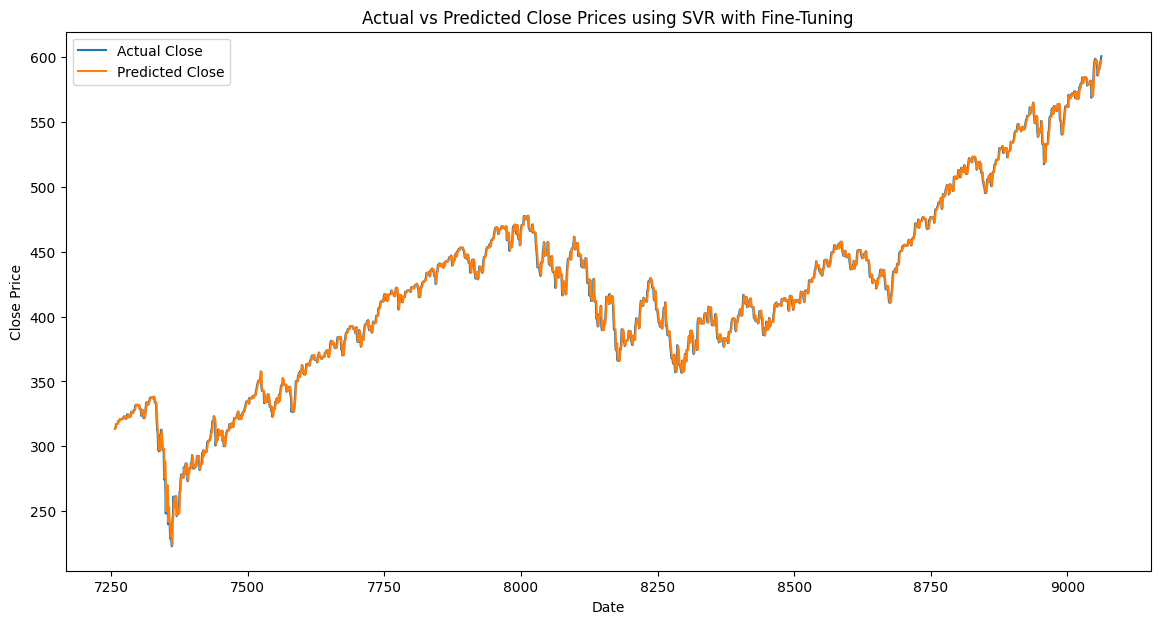

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Prepare the data with 7 days input and 1 day output
def create_sequences(X, y, window=7):
    Xs, ys = [], []
    for i in range(len(X) - window):
        Xs.append(X[i:i+window].flatten())
        ys.append(y[i+window])
    return np.array(Xs), np.array(ys)

# Combine features and target into one array
scaled_train_data = np.hstack((scaled_X_train, scaled_y_train.reshape(-1, 1)))
scaled_test_data = np.hstack((scaled_X_test, scaled_y_test.reshape(-1, 1)))

# Create sequences
X_train_seq, y_train_seq = create_sequences(scaled_train_data, scaled_y_train, window=7)
X_test_seq, y_test_seq = create_sequences(scaled_test_data, scaled_y_test, window=7)

# Define a TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Set up the parameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear']
}
# param_grid = {
#     'C': [1],
#     'gamma': ['auto'],
#     'epsilon': [1],
#     'kernel': ['rbf', 'linear']
# }

# Initialize SVR
svr = SVR()

# Custom GridSearchCV with tqdm
class TQDMGridSearchCV(GridSearchCV):
    def fit(self, X, y=None, **fit_params):
        n_candidates = len(self.param_grid['C']) * len(self.param_grid['gamma']) * len(self.param_grid['epsilon']) * len(self.param_grid['kernel'])
        self._tqdm = tqdm(total=n_candidates, desc="GridSearchCV")
        super().fit(X, y, **fit_params)
        self._tqdm.close()
        return self

    def _fit_and_score(self, estimator, X, y, scorer, train, test, verbose, parameters, fit_params, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=False, return_estimator=False, error_score='raise'):
        self._tqdm.update(1)
        return super()._fit_and_score(estimator, X, y, scorer, train, test, verbose, parameters, fit_params, return_train_score, return_parameters, return_n_test_samples, return_times, return_estimator, error_score)

# Set up GridSearchCV with tqdm
grid_search = TQDMGridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train_seq, y_train_seq.ravel())

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train SVR with best parameters
best_svr = grid_search.best_estimator_

# Make predictions
train_predictions_scaled = best_svr.predict(X_train_seq)
test_predictions_scaled = best_svr.predict(X_test_seq)

# Inverse transform predictions
train_predictions = target_scaler.inverse_transform(train_predictions_scaled.reshape(-1, 1))
test_predictions = target_scaler.inverse_transform(test_predictions_scaled.reshape(-1, 1))
y_train_actual = target_scaler.inverse_transform(y_train_seq.reshape(-1, 1))
y_test_actual = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predictions))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

# Create a DataFrame for plotting
dates_train_seq = train_df.index[7:]  # Adjusted for window size
dates_test_seq = test_df.index[7:]    # Adjusted for window size

train_pred_df = pd.DataFrame({
    'Date': dates_train_seq,
    'Actual_Close': y_train_actual.flatten(),
    'Predicted_Close': train_predictions.flatten()
})

test_pred_df = pd.DataFrame({
    'Date': dates_test_seq,
    'Actual_Close': y_test_actual.flatten(),
    'Predicted_Close': test_predictions.flatten()
})

# Plot Actual vs Predicted Close Prices for test set
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(test_pred_df['Date'], test_pred_df['Actual_Close'], label='Actual Close')
plt.plot(test_pred_df['Date'], test_pred_df['Predicted_Close'], label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices using SVR with Fine-Tuning')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error

from tqdm import tqdm

# Prepare the data with 7 days input and 1 day output
def create_sequences(X, y, window=7):
    Xs, ys = [], []
    for i in range(len(X) - window):
        Xs.append(X[i:i+window].flatten())
        ys.append(y[i+window])
    return np.array(Xs), np.array(ys)

# Combine features and target into one array
scaled_train_data = np.hstack((scaled_X_train, scaled_y_train.reshape(-1, 1)))
scaled_test_data = np.hstack((scaled_X_test, scaled_y_test.reshape(-1, 1)))

# Create sequences
X_train_seq, y_train_seq = create_sequences(scaled_train_data, scaled_y_train, window=7)
X_test_seq, y_test_seq = create_sequences(scaled_test_data, scaled_y_test, window=7)

# Define a TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Set up the parameter grid for SVR
param_grid = {
    'C': [10, 100, 1000],
    'epsilon': [0.001, 0.01, 0.1],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],
    'max_iter': [-1],
    'kernel': ['linear']
}

# Initialize SVR
svr = SVR()

# Custom GridSearchCV with tqdm
class TQDMGridSearchCV(GridSearchCV):
    def fit(self, X, y=None, **fit_params):
        n_candidates = len(self.param_grid['C']) * len(self.param_grid['epsilon']) * len(self.param_grid['tol']) * len(self.param_grid['max_iter']) * len(self.param_grid['kernel'])
        self._tqdm = tqdm(total=n_candidates, desc="GridSearchCV")
        super().fit(X, y, **fit_params)
        self._tqdm.close()
        return self

    def _fit_and_score(self, estimator, X, y, scorer, train, test, verbose, parameters, fit_params, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=False, return_estimator=False, error_score='raise'):
        self._tqdm.update(1)
        return super()._fit_and_score(estimator, X, y, scorer, train, test, verbose, parameters, fit_params, return_train_score, return_parameters, return_n_test_samples, return_times, return_estimator, error_score)

# Set up GridSearchCV with tqdm
grid_search = TQDMGridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train_seq, y_train_seq.ravel())

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train SVR with best parameters
best_svr = grid_search.best_estimator_

# Make predictions
train_predictions_scaled = best_svr.predict(X_train_seq)
test_predictions_scaled = best_svr.predict(X_test_seq)

# Inverse transform predictions
train_predictions = target_scaler.inverse_transform(train_predictions_scaled.reshape(-1, 1))
test_predictions = target_scaler.inverse_transform(test_predictions_scaled.reshape(-1, 1))
y_train_actual = target_scaler.inverse_transform(y_train_seq.reshape(-1, 1))
y_test_actual = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predictions))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

# Create a DataFrame for plotting
dates_train_seq = train_df.index[7:]  # Adjusted for window size
dates_test_seq = test_df.index[7:]    # Adjusted for window size

train_pred_df = pd.DataFrame({
    'Date': dates_train_seq,
    'Actual_Close': y_train_actual.flatten(),
    'Predicted_Close': train_predictions.flatten()
})

test_pred_df = pd.DataFrame({
    'Date': dates_test_seq,
    'Actual_Close': y_test_actual.flatten(),
    'Predicted_Close': test_predictions.flatten()
})

# Plot Actual vs Predicted Close Prices for test set

plt.figure(figsize=(14, 7))
plt.plot(test_pred_df['Date'], test_pred_df['Actual_Close'], label='Actual Close')
plt.plot(test_pred_df['Date'], test_pred_df['Predicted_Close'], label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices using SVR with Fine-Tuning')
plt.legend()
plt.show()

Fitting 5 folds for each of 36 candidates, totalling 180 fits


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV:   0%|          | 0/24 [00:36<?, ?it/s]


Best parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
Train RMSE: 1.1996
Test RMSE: 194.0372


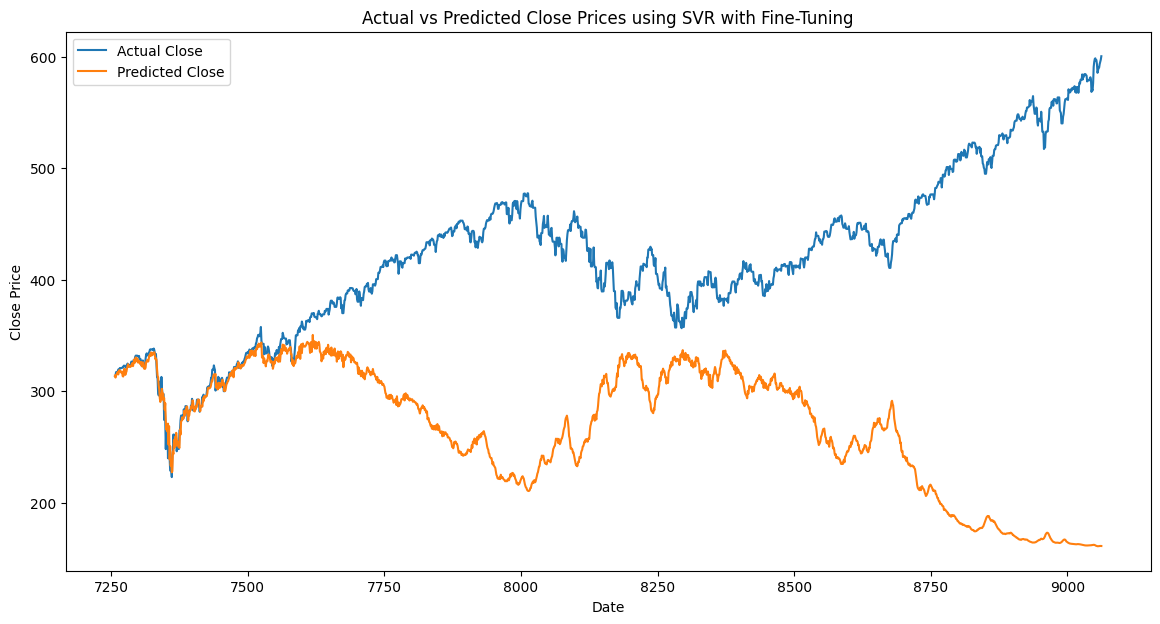

In [27]:
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
# from sklearn.base import clone

# Prepare the data with 7 days input and 1 day output
def create_sequences(X, y, window=7):
    Xs, ys = [], []
    for i in range(len(X) - window):
        Xs.append(X[i:i+window].flatten())
        ys.append(y[i+window])
    return np.array(Xs), np.array(ys)

# Combine features and target into one array
scaled_train_data = np.hstack((scaled_X_train, scaled_y_train.reshape(-1, 1)))
scaled_test_data = np.hstack((scaled_X_test, scaled_y_test.reshape(-1, 1)))

# Create sequences
X_train_seq, y_train_seq = create_sequences(scaled_train_data, scaled_y_train, window=7)
X_test_seq, y_test_seq = create_sequences(scaled_test_data, scaled_y_test, window=7)

# Define a TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Set up the parameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['rbf']
}
# param_grid = {
#     'C': [1],
#     'gamma': ['auto'],
#     'epsilon': [1],
#     'kernel': ['rbf', 'linear']
# }

# Initialize SVR
svr = SVR()

# Custom GridSearchCV with tqdm
class TQDMGridSearchCV(GridSearchCV):
    def fit(self, X, y=None, **fit_params):
        n_candidates = len(self.param_grid['C']) * len(self.param_grid['gamma']) * len(self.param_grid['epsilon']) * len(self.param_grid['kernel'])
        self._tqdm = tqdm(total=n_candidates, desc="GridSearchCV")
        super().fit(X, y, **fit_params)
        self._tqdm.close()
        return self

    def _fit_and_score(self, estimator, X, y, scorer, train, test, verbose, parameters, fit_params, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=False, return_estimator=False, error_score='raise'):
        self._tqdm.update(1)
        return super()._fit_and_score(estimator, X, y, scorer, train, test, verbose, parameters, fit_params, return_train_score, return_parameters, return_n_test_samples, return_times, return_estimator, error_score)

# Set up GridSearchCV with tqdm
grid_search = TQDMGridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train_seq, y_train_seq.ravel())

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train SVR with best parameters
best_svr = grid_search.best_estimator_

# Make predictions
train_predictions_scaled = best_svr.predict(X_train_seq)
test_predictions_scaled = best_svr.predict(X_test_seq)

# Inverse transform predictions
train_predictions = target_scaler.inverse_transform(train_predictions_scaled.reshape(-1, 1))
test_predictions = target_scaler.inverse_transform(test_predictions_scaled.reshape(-1, 1))
y_train_actual = target_scaler.inverse_transform(y_train_seq.reshape(-1, 1))
y_test_actual = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predictions))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

# Create a DataFrame for plotting
dates_train_seq = train_df.index[7:]  # Adjusted for window size
dates_test_seq = test_df.index[7:]    # Adjusted for window size

train_pred_df = pd.DataFrame({
    'Date': dates_train_seq,
    'Actual_Close': y_train_actual.flatten(),
    'Predicted_Close': train_predictions.flatten()
})

test_pred_df = pd.DataFrame({
    'Date': dates_test_seq,
    'Actual_Close': y_test_actual.flatten(),
    'Predicted_Close': test_predictions.flatten()
})

# Plot Actual vs Predicted Close Prices for test set
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(test_pred_df['Date'], test_pred_df['Actual_Close'], label='Actual Close')
plt.plot(test_pred_df['Date'], test_pred_df['Predicted_Close'], label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices using SVR with Fine-Tuning')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Prepare the data with 7 days input and 1 day output
def create_sequences(X, y, window=7):
    Xs, ys = [], []
    for i in tqdm(range(len(X) - window), desc="Creating sequences"):
        Xs.append(X[i:i+window].flatten())
        ys.append(y[i+window])
    return np.array(Xs), np.array(ys)

# Combine features and target into one array
scaled_train_data = np.hstack((scaled_X_train, scaled_y_train.reshape(-1, 1)))
scaled_test_data = np.hstack((scaled_X_test, scaled_y_test.reshape(-1, 1)))

# Create sequences
X_train_seq, y_train_seq = create_sequences(scaled_train_data, scaled_y_train, window=7)
X_test_seq, y_test_seq = create_sequences(scaled_test_data, scaled_y_test, window=7)

# Define a TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Set up the parameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Initialize SVR
svr = SVR()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train_seq, y_train_seq.ravel())

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train SVR with best parameters
best_svr = grid_search.best_estimator_

# Make predictions
train_predictions_scaled = best_svr.predict(X_train_seq)
test_predictions_scaled = best_svr.predict(X_test_seq)

# Inverse transform predictions
train_predictions = target_scaler.inverse_transform(train_predictions_scaled.reshape(-1, 1))
test_predictions = target_scaler.inverse_transform(test_predictions_scaled.reshape(-1, 1))
y_train_actual = target_scaler.inverse_transform(y_train_seq.reshape(-1, 1))
y_test_actual = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predictions))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

# Create a DataFrame for plotting
dates_train_seq = train_df.index[7:]  # Adjusted for window size
dates_test_seq = test_df.index[7:]    # Adjusted for window size

train_pred_df = pd.DataFrame({
    'Date': dates_train_seq,
    'Actual_Close': y_train_actual.flatten(),
    'Predicted_Close': train_predictions.flatten()
})

test_pred_df = pd.DataFrame({
    'Date': dates_test_seq,
    'Actual_Close': y_test_actual.flatten(),
    'Predicted_Close': test_predictions.flatten()
})

# Plot Actual vs Predicted Close Prices for test set

plt.figure(figsize=(14, 7))
plt.plot(test_pred_df['Date'], test_pred_df['Actual_Close'], label='Actual Close')
plt.plot(test_pred_df['Date'], test_pred_df['Predicted_Close'], label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices using SVR with Fine-Tuning')
plt.legend()
plt.show()

In [68]:
# Prepare data for visualization
test_dates = np.array(dates_test).flatten()  # Ensure dates_test is 1-dimensional
y_test_flat = np.array(y_test).flatten()  # Ensure y_test is 1-dimensional
test_predictions_flat = np.array(test_predictions).flatten()  # Ensure test_predictions is 1-dimensional

pred_df = pd.DataFrame({
    'Date': test_dates,
    'Actual_Close': y_test_flat,
    'Predicted_Close': test_predictions_flat
})

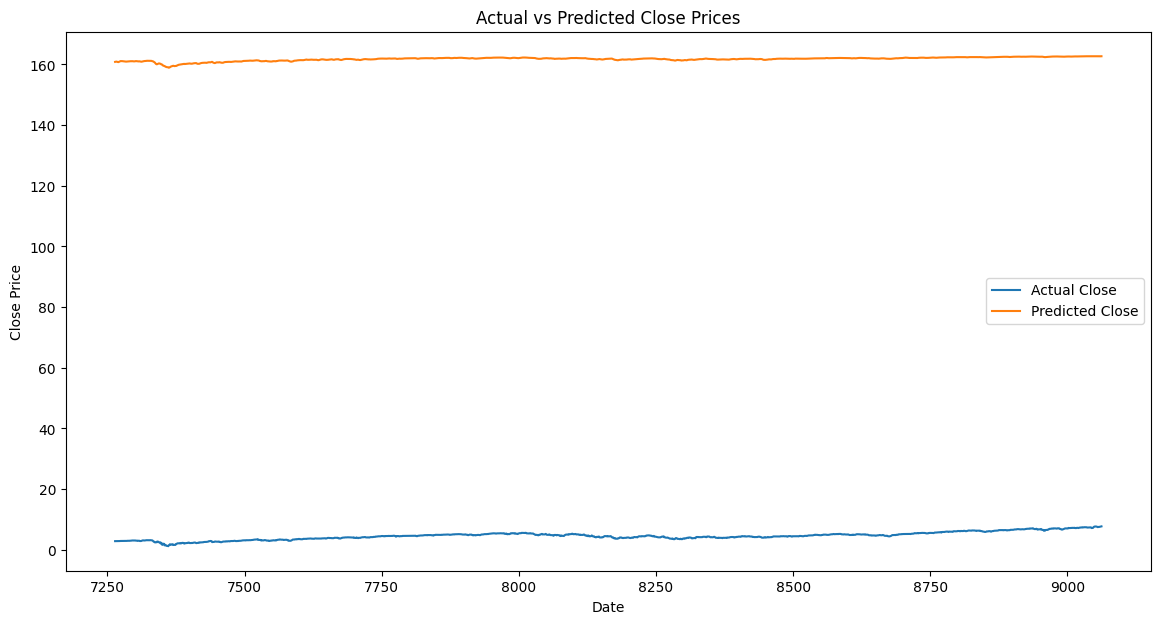

In [69]:
# Plot Actual vs Predicted Close Prices
plt.figure(figsize=(14, 7))
plt.plot(pred_df['Date'], pred_df['Actual_Close'], label='Actual Close')
plt.plot(pred_df['Date'], pred_df['Predicted_Close'], label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()

In [50]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [51]:
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error
from torch.utils.data import DataLoader, TensorDataset

In [52]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, output_size=1, num_layers=2, dropout=0.3):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # trying  bidirectional LSTM
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True  # make false to remove birirectional
        )

        # Batch normalization
        self.batch_norm = nn.BatchNorm1d(hidden_size * 2)  # *2 for bidirectional
        
        # 
        self.fc_layers = nn.Sequential(
            nn.Linear(hidden_size * 2, hidden_size),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_size),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_size // 2),
            nn.Dropout(dropout),
            nn.Linear(hidden_size // 2, output_size)
        )

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)  # *2 for bidirectional
        c_0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)  # *2 for bidirectional

        out, _ = self.lstm(x, (h_0, c_0))
        out = self.batch_norm(out[:, -1, :])
        out = self.fc_layers(out)
        return out

# Model initialization with modified hyperparameters
input_size = X_train.shape[2]
hidden_size = 32  
output_size = 1
num_layers = 2
dropout = 0.3  

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(input_size, hidden_size, output_size, num_layers, dropout).to(device)

#loss function with L1 regularization
def custom_loss(outputs, targets, model, l1_lambda=0.01):
    mse_loss = nn.MSELoss()(outputs, targets)
    l1_reg = torch.tensor(0., requires_grad=True).to(outputs.device)
    for param in model.parameters():
        l1_reg = l1_reg + torch.norm(param, 1)
    return mse_loss + l1_lambda * l1_reg

optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=0.0005,  
    weight_decay=0.05,  
    betas=(0.9, 0.999)
)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.2,  
    patience=3,  
    min_lr=1e-6,
    verbose=True
)

# Training parameters
num_epochs = 100
early_stopping_patience = 7  
best_val_loss = float('inf')
patience_counter = 0

# Lists to store losses
train_losses = []
val_losses = []

c:\Users\tings\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [53]:
# Training loop with validation split

val_size = int(len(X_train_tensor) * 0.2)
train_size = len(X_train_tensor) - val_size

X_train_final = X_train_tensor[:train_size]
y_train_final = y_train_tensor[:train_size]
dates_train_final = dates_train[:train_size]

x_val = X_train_tensor[train_size:]
y_val = y_train_tensor[train_size:]
dates_val = dates_train[train_size:]

# train_subset, val_subset = torch.utils.data.random_split(train_dataset, [len(train_dataset) - val_size, val_size])

# train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=False)
# val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

In [54]:
# Create DataLoader

batch_size = 32
train_dataset = TensorDataset(X_train_final, y_train_final)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_dataset = TensorDataset(x_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

model_params.update({
    'train_size': train_size,
    'val_size': val_size,
    'dates_train_final': dates_train_final,
    'dates_val': dates_val,
    'dates_test': dates_test
})

In [55]:
# Training loop
num_epochs = 100
early_stopping_patience = 7  # Increased patience
best_val_loss = float('inf')
patience_counter = 0

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = custom_loss(outputs, batch_y, model)  # Using custom loss
        
        loss.backward()
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        total_train_loss += loss.item()
    
    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Validation phase
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            val_loss = custom_loss(outputs, batch_y, model)
            total_val_loss += val_loss.item()
    
    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    
    scheduler.step(avg_val_loss)
    
    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
    
    if patience_counter >= early_stopping_patience:
        print(f'Early stopping triggered at epoch {epoch + 1}')
        break
    
    if (epoch + 1) % 5 == 0:  # Increased printing frequency
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Val Loss: {avg_val_loss:.4f}')
        
# Load best model and generate predictions
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

with torch.no_grad():
    train_predictions = model(X_train_final.to(device)).cpu().numpy()
    val_predictions = model(x_val.to(device)).cpu().numpy()
    test_predictions = model(X_test_tensor.to(device)).cpu().numpy()

# Inverse transform predictions and actual values
train_predictions = target_scaler.inverse_transform(train_predictions)
val_predictions = target_scaler.inverse_transform(val_predictions)
test_predictions = target_scaler.inverse_transform(test_predictions)

y_train_actual = target_scaler.inverse_transform(y_train_final.cpu().numpy().reshape(-1, 1))
y_val_actual = target_scaler.inverse_transform(y_val.cpu().numpy().reshape(-1, 1))
y_test_actual = target_scaler.inverse_transform(y_test_tensor.cpu().numpy().reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(np.mean((train_predictions - y_train_actual) ** 2))
val_rmse = np.sqrt(np.mean((val_predictions - y_val_actual) ** 2))
test_rmse = np.sqrt(np.mean((test_predictions - y_test_actual) ** 2))

print(f"\nFinal Results:")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")

# Update model_params
model_params.update({
    'model': model,
    'train_rmse': train_rmse,
    'val_rmse': val_rmse,
    'test_rmse': test_rmse,
    'train_losses': train_losses,
    'val_losses': val_losses,
    'train_predictions': train_predictions,
    'val_predictions': val_predictions,
    'test_predictions': test_predictions
})

c:\Users\tings\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\tings\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([29])) that is different to the input size (torch.Size([29, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\tings\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorre

Epoch [5/100], Train Loss: 1.0978, Val Loss: 5.5473
Epoch [10/100], Train Loss: 0.5351, Val Loss: 4.8677
Epoch [15/100], Train Loss: 0.3370, Val Loss: 4.7296
Epoch [20/100], Train Loss: 0.3328, Val Loss: 4.7200
Epoch [25/100], Train Loss: 0.3171, Val Loss: 4.7059
Epoch [30/100], Train Loss: 0.3169, Val Loss: 4.7055
Epoch [35/100], Train Loss: 0.3138, Val Loss: 4.7023
Epoch [40/100], Train Loss: 0.3131, Val Loss: 4.7017
Epoch [45/100], Train Loss: 0.3131, Val Loss: 4.7015
Epoch [50/100], Train Loss: 0.3130, Val Loss: 4.7015
Epoch [55/100], Train Loss: 0.3132, Val Loss: 4.7015
Epoch [60/100], Train Loss: 0.3131, Val Loss: 4.7014
Epoch [65/100], Train Loss: 0.3130, Val Loss: 4.7014
Epoch [70/100], Train Loss: 0.3131, Val Loss: 4.7013
Epoch [75/100], Train Loss: 0.3130, Val Loss: 4.7013
Epoch [80/100], Train Loss: 0.3131, Val Loss: 4.7013
Epoch [85/100], Train Loss: 0.3131, Val Loss: 4.7013
Epoch [90/100], Train Loss: 0.3131, Val Loss: 4.7012
Epoch [95/100], Train Loss: 0.3131, Val Loss: 4

C:\Users\tings\AppData\Local\Temp\ipykernel_54732\3722462452.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


In [ ]:
# # Check for NaN values in the training features and target
# print('NaN in X_train_tensor:', torch.isnan(X_train_tensor).any())
# print('NaN in y_train_tensor:', torch.isnan(y_train_tensor).any())

# # Check for Infinite values in the training features and target
# print('Infinite in X_train_tensor:', torch.isinf(X_train_tensor).any())
# print('Infinite in y_train_tensor:', torch.isinf(y_train_tensor).any())

NaN in X_train_tensor: tensor(False)
NaN in y_train_tensor: tensor(False)
Infinite in X_train_tensor: tensor(False)
Infinite in y_train_tensor: tensor(False)


In [ ]:
# # Identify columns with null values
# null_counts = scaled_train_df.isnull().sum()

# # Filter only columns with null values
# columns_with_nulls = null_counts[null_counts > 0]

# print("Columns with null values and their counts:")
# print(columns_with_nulls)

Columns with null values and their counts:
Series([], dtype: int64)


In [57]:
# Make predictions
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

train_predictions = []
with torch.no_grad():
    for X_batch, _ in train_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        train_predictions.extend(outputs.cpu().squeeze().tolist())

test_predictions = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        test_predictions.extend(outputs.cpu().squeeze().tolist())

# # Make predictions
# model.eval()
# train_predictions = []
# with torch.no_grad():
#     for X_batch, _ in train_loader:
#         outputs = model(X_batch)
#         train_predictions.extend(outputs.squeeze().tolist())

# test_predictions = []
# with torch.no_grad():
#     for X_batch, _ in test_loader:
#         outputs = model(X_batch)
#         test_predictions.extend(outputs.squeeze().tolist())

In [ ]:
# Ensure the lengths of predictions and actual values are consistent
train_predictions = train_predictions[:len(y_train)]
test_predictions = test_predictions[:len(y_test)]

# Ensure the lengths of predictions and actual values are consistent
y_train = y_train[:len(train_predictions)]
y_test = y_test[:len(test_predictions)]

# Evaluate performance
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train RMSE: 0.5558
Test RMSE: 5.1246


In [62]:
# Prepare data for visualization
test_dates = np.array(dates_test).flatten()  # Ensure dates_test is 1-dimensional
y_test_flat = np.array(y_test).flatten()  # Ensure y_test is 1-dimensional
test_predictions_flat = np.array(test_predictions).flatten()  # Ensure test_predictions is 1-dimensional

pred_df = pd.DataFrame({
    'Date': test_dates,
    'Actual_Close': y_test_flat,
    'Predicted_Close': test_predictions_flat
})

# # Prepare data for visualization
# test_dates = dates_test  # Dates corresponding to the test predictions
# pred_df = pd.DataFrame({
#     'Date': test_dates,
#     'Actual_Close': y_test,
#     'Predicted_Close': test_predictions
# })

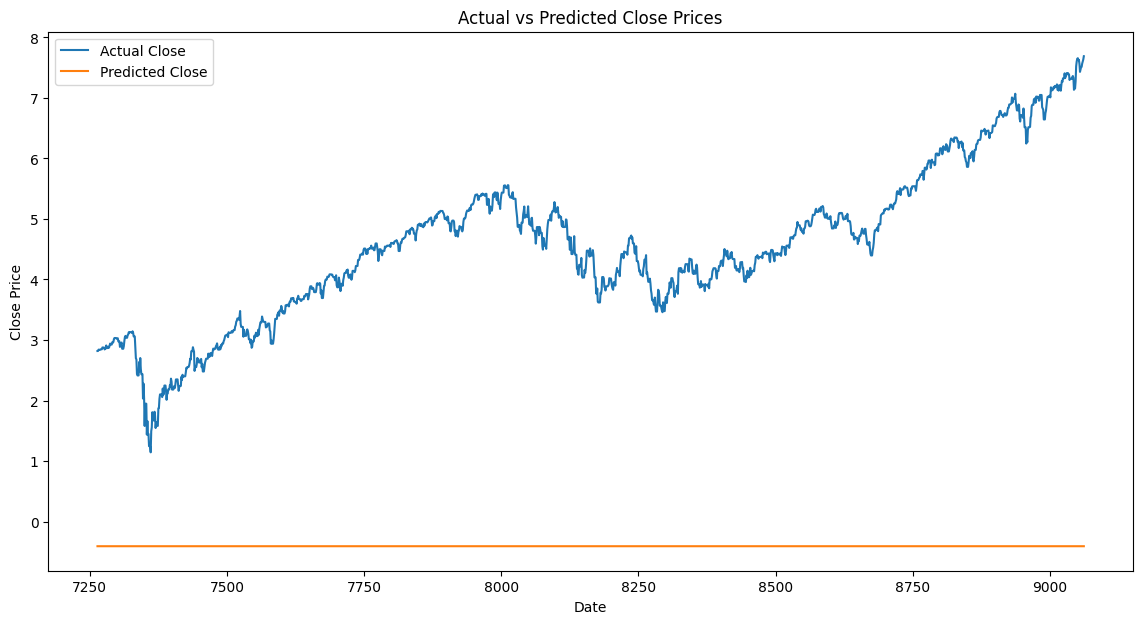

In [63]:
# Plot Actual vs Predicted Close Prices
plt.figure(figsize=(14, 7))
plt.plot(pred_df['Date'], pred_df['Actual_Close'], label='Actual Close')
plt.plot(pred_df['Date'], pred_df['Predicted_Close'], label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()